# Exploratory Data Analysis - IPL(2008-2019)

The main objection of this is to find out the most successful teams, players and factors contributing win or loss of a team. 

**Importing Libraries**

- *Numpy*
- *Pandas*
- *Matplotlib*
- *Seaborn* 
- *Plotly*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Importing Data**

In [2]:
matches = pd.read_csv("matches.csv")

**Understanding Data**

In [3]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
matches.tail()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


In [5]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


**Cleaning Data**

In [6]:
matches.isna().count()

id                 756
season             756
city               756
date               756
team1              756
team2              756
toss_winner        756
toss_decision      756
result             756
dl_applied         756
winner             756
win_by_runs        756
win_by_wickets     756
player_of_match    756
venue              756
umpire1            756
umpire2            756
umpire3            756
dtype: int64

In [7]:
matches.drop(['umpire1','umpire2','umpire3'],axis=1,inplace=True) #dropping which is not relevant

In [8]:
matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium


**PLAYER OF MATCHES**

In [9]:
matches['player_of_match'].value_counts()

CH Gayle           21
AB de Villiers     20
DA Warner          17
MS Dhoni           17
RG Sharma          17
                   ..
MS Bisla            1
MA Starc            1
EJG Morgan          1
KMDN Kulasekara     1
J Theron            1
Name: player_of_match, Length: 226, dtype: int64

In [10]:
matches['player_of_match'].value_counts()[0:5]

CH Gayle          21
AB de Villiers    20
DA Warner         17
MS Dhoni          17
RG Sharma         17
Name: player_of_match, dtype: int64

In [11]:
top_player_of_matches=(matches['player_of_match'].value_counts()[0:5]).to_frame()

In [12]:
top_player_of_matches=top_player_of_matches['player_of_match']

c:\users\kumar aditya\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='player_of_match'>

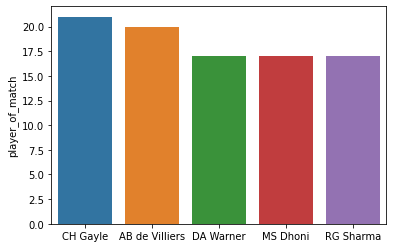

In [13]:
sns.barplot(top_player_of_matches.keys(), top_player_of_matches)

**Toss Effects**

In [14]:
toss_wins = matches['toss_winner'].value_counts()

In [15]:
toss_wins.head()

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Royal Challengers Bangalore    81
Kings XI Punjab                81
Name: toss_winner, dtype: int64

c:\users\kumar aditya\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='toss_winner'>

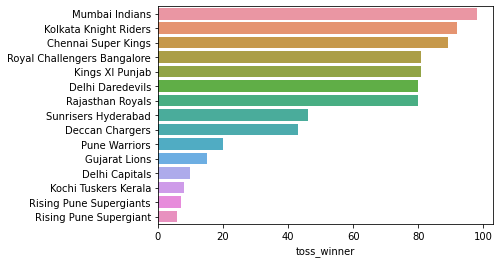

In [16]:
sns.barplot(toss_wins, toss_wins.keys())

In [17]:
toss_wins_matches = matches[matches['winner']==matches['toss_winner']]['winner'].value_counts()

c:\users\kumar aditya\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='winner'>

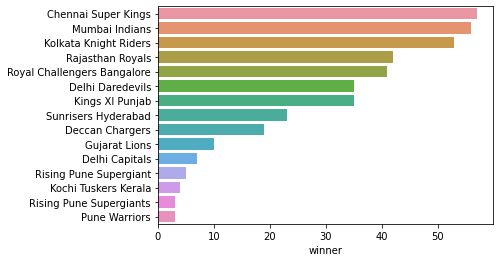

In [18]:
sns.barplot(toss_wins_matches, toss_wins_matches.keys())

**Results(Results, Tie or No Result)**

In [19]:
ipl_results=matches['result'].value_counts()

In [20]:
ipl_results

normal       743
tie            9
no result      4
Name: result, dtype: int64

**Batting First and Bowling First**

In [21]:
win_batting_first=matches[matches['win_by_runs']!=0].count()['win_by_runs']
win_bowling_first=matches[matches['win_by_wickets']!=0].count()['win_by_wickets']

In [22]:
total_matches=ipl_results.sum()

In [23]:
win_batting_first

337

In [24]:
total_matches

756

In [25]:
win_bowling_first

406

In [26]:
win={'Type':['Batting First','Batting Second','Tie','No Result'], 'Wins':[win_batting_first, win_bowling_first,
                                                                          ipl_results[1], ipl_results[2]]}

In [27]:
win=pd.DataFrame(win)

In [28]:
win

,Type,Wins
0,Batting First,337
1,Batting Second,406
2,Tie,9
3,No Result,4


c:\users\kumar aditya\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type', ylabel='Wins'>

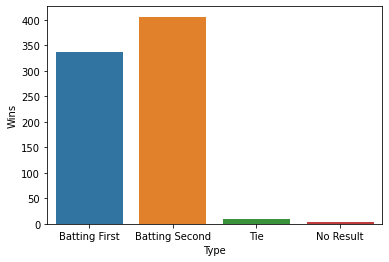

In [29]:
sns.barplot('Type', 'Wins', data = win)

**Duckworth–Lewis–Stern method**

In [30]:
dl=matches[matches['dl_applied']!=0]

In [31]:
dl.drop(['id', 'city', 'date','player_of_match','venue','result','season','dl_applied'],axis=1, inplace = True);

c:\users\kumar aditya\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [32]:
dl

,team1,team2,toss_winner,toss_decision,winner,win_by_runs,win_by_wickets
56,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,0,7
99,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,Kings XI Punjab,6,0
102,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,Chennai Super Kings,3,0
119,Kings XI Punjab,Delhi Daredevils,Delhi Daredevils,field,Delhi Daredevils,0,10
122,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,11,0
148,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,Chennai Super Kings,12,0
251,Chennai Super Kings,Kochi Tuskers Kerala,Kochi Tuskers Kerala,field,Kochi Tuskers Kerala,0,7
280,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,Kolkata Knight Riders,10,0
290,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,0,4
488,Delhi Daredevils,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,0,8


In [33]:
dl_win_by_runs=dl[dl['win_by_runs']!=0].count()['win_by_runs']
dl_win_by_wickets=dl[dl['win_by_wickets']!=0].count()['win_by_wickets']

In [34]:
dl_win=pd.DataFrame({'Type':['Batting First','Batting Second'], 'Wins':[dl_win_by_runs, dl_win_by_wickets]})

c:\users\kumar aditya\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type', ylabel='Wins'>

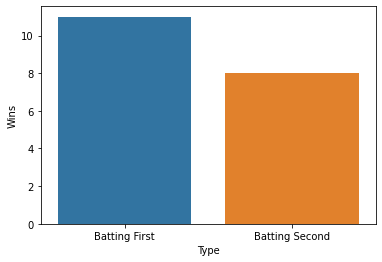

In [35]:
sns.barplot('Type','Wins', data = dl_win)

**Total Matches Each**

In [36]:
total_matches_each = matches['team1'].value_counts() + matches['team2'].value_counts()

c:\users\kumar aditya\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

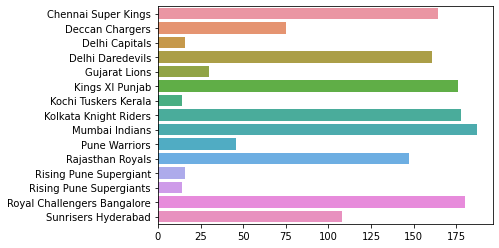

In [37]:
sns.barplot(total_matches_each, total_matches_each.keys())

**Total Wins Each**

In [38]:
matches_won_each = matches['winner'].value_counts()

In [39]:
matches_won_each

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

c:\users\kumar aditya\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='winner'>

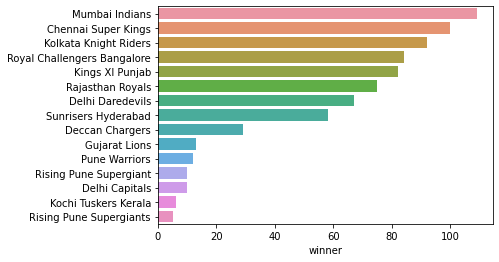

In [40]:
sns.barplot(matches_won_each, matches_won_each.keys())

**Win Percent**

In [41]:
win_percent = matches_won_each/total_matches_each*100

In [42]:
win_percent

Chennai Super Kings            60.975610
Deccan Chargers                38.666667
Delhi Capitals                 62.500000
Delhi Daredevils               41.614907
Gujarat Lions                  43.333333
Kings XI Punjab                46.590909
Kochi Tuskers Kerala           42.857143
Kolkata Knight Riders          51.685393
Mumbai Indians                 58.288770
Pune Warriors                  26.086957
Rajasthan Royals               51.020408
Rising Pune Supergiant         62.500000
Rising Pune Supergiants        35.714286
Royal Challengers Bangalore    46.666667
Sunrisers Hyderabad            53.703704
dtype: float64

c:\users\kumar aditya\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

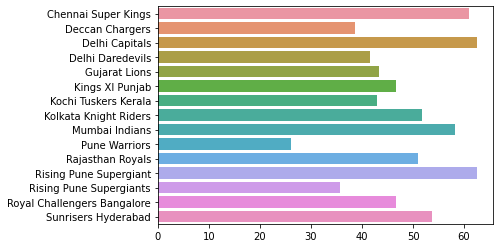

In [43]:
sns.barplot(win_percent,win_percent.keys())

**Toss Decision**

In [44]:
toss_decision = matches['toss_decision'].value_counts()

In [45]:
for i in range(0,len(toss_decision)):
    toss_decision[i]= toss_decision[i]/total_matches*100

c:\users\kumar aditya\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='toss_decision'>

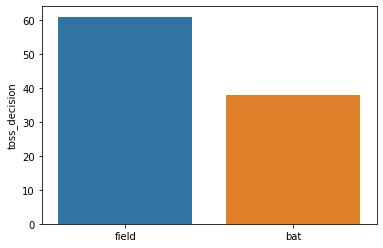

In [46]:
sns.barplot(toss_decision.keys(), toss_decision)

In [47]:
matches.drop(['date'], axis = 1, inplace = True) #Drop date

In [48]:
matches

,id,season,city,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2,2017,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,3,2017,Rajkot,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,4,2017,Indore,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,5,2017,Bangalore,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium
752,11412,2019,Chennai,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium
753,11413,2019,Visakhapatnam,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium
754,11414,2019,Visakhapatnam,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium


**Effect of toss on match**

In [49]:
toss_winner_wins = matches[matches['toss_winner']==matches['winner']]['winner'].count()

In [50]:
toss_looser_wins = matches[matches['toss_winner']!=matches['winner']]['winner'].count()

In [51]:
data_frame_toss_and_win = pd.DataFrame({'Toss':['Toss Looser Wins', 'Toss Winner Wins'], 
                                        'Win': [toss_looser_wins,toss_winner_wins]})

<AxesSubplot:xlabel='Toss', ylabel='Win'>

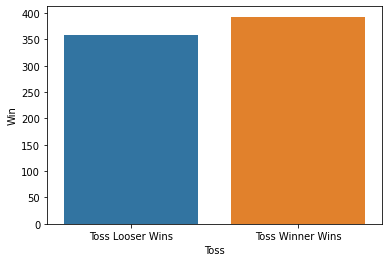

In [52]:
sns.barplot(x='Toss', y = 'Win', data = data_frame_toss_and_win)

**Stats for each Venue**

In [53]:
matches

,id,season,city,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2,2017,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,3,2017,Rajkot,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,4,2017,Indore,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,5,2017,Bangalore,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium
752,11412,2019,Chennai,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium
753,11413,2019,Visakhapatnam,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium
754,11414,2019,Visakhapatnam,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium


In [54]:
matches_city = matches['city'].value_counts()

In [55]:
matches_city = dict(matches_city)

In [56]:
matches

,id,season,city,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2,2017,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,3,2017,Rajkot,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,4,2017,Indore,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,5,2017,Bangalore,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium
752,11412,2019,Chennai,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium
753,11413,2019,Visakhapatnam,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium
754,11414,2019,Visakhapatnam,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium


<ipython-input-57-1b17ebd03fdc>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


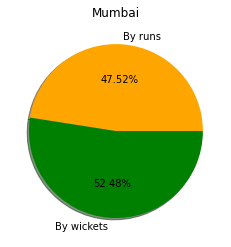

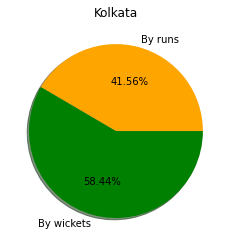

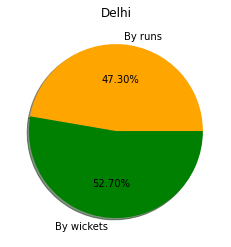

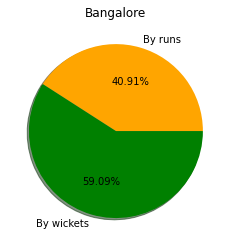

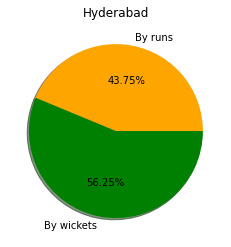

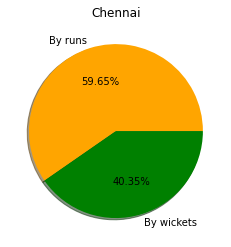

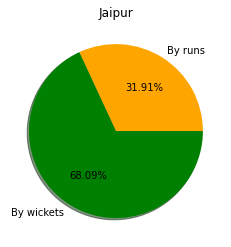

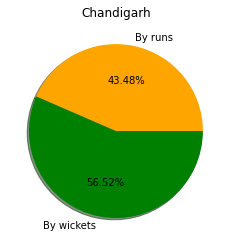

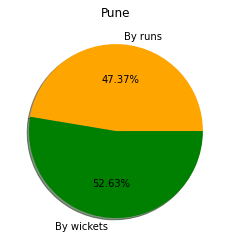

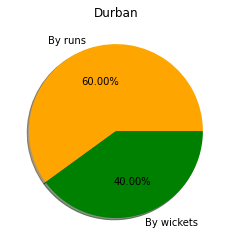

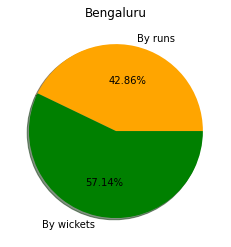

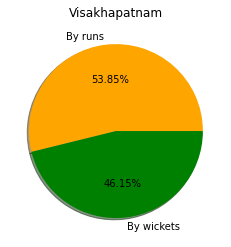

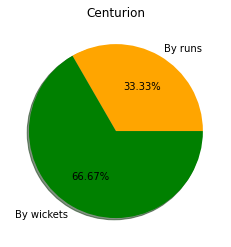

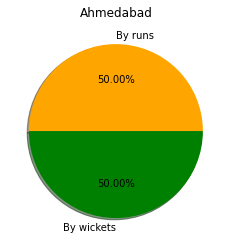

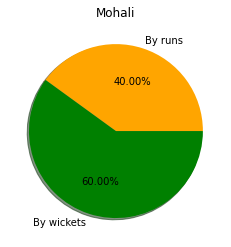

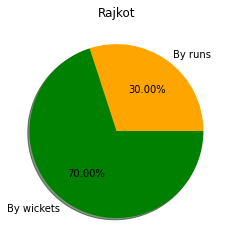

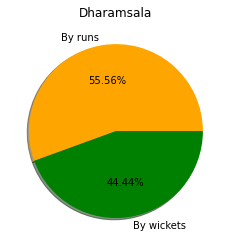

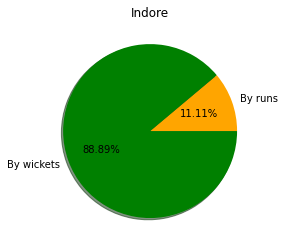

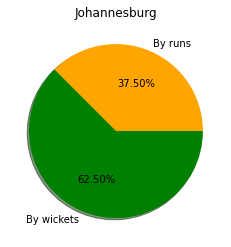

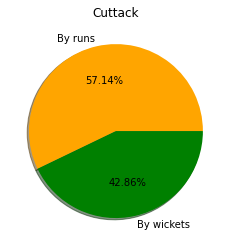

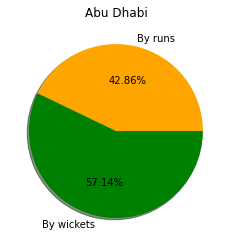

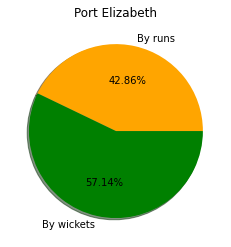

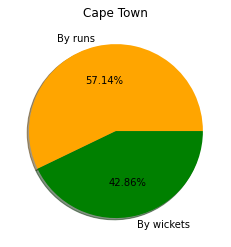

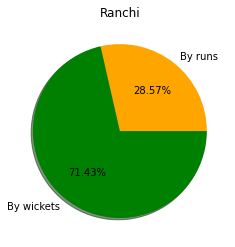

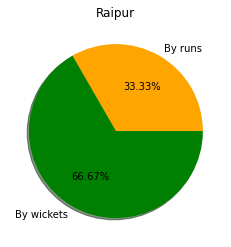

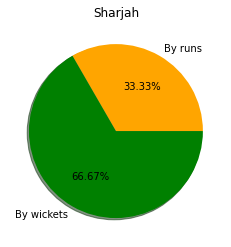

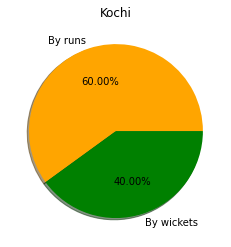

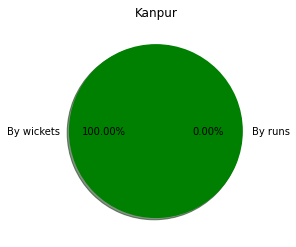

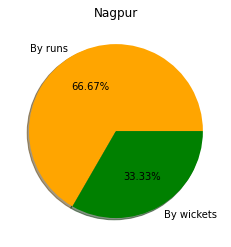

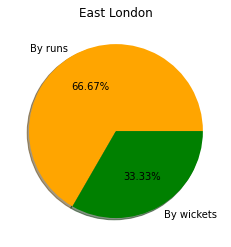

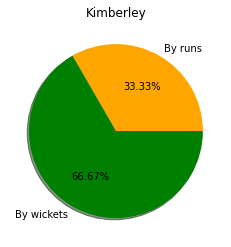

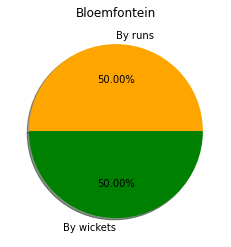

In [57]:
i=0
for key in matches_city:
    venue=key
    venue_matches = matches[matches['city']==venue]
    venue_matches_batting_first_wins = venue_matches[venue_matches['win_by_runs']!=0].count()['win_by_runs']
    venue_matches_bowling_first_wins = venue_matches[venue_matches['win_by_runs']==0].count()['win_by_wickets']
    df_venue_matches = pd.DataFrame({'win':['By runs','By wickets'], 'Count': [venue_matches_batting_first_wins, 
                                                                               venue_matches_bowling_first_wins]})
    df_venue_matches.set_index('win',inplace = True)
    plt.figure(i)
    i+=1
    plt.pie(df_venue_matches['Count'], labels = df_venue_matches.index,autopct = "%.2f%%", shadow= True,
            colors = ['orange', 'green'])
    plt.title(venue)
plt.show();

In [58]:
#Function for a particular venue
def venue_data(venue):
    if venue in matches_city:
        venue_matches = matches[matches['city']==venue]
        venue_matches_batting_first_wins = venue_matches[venue_matches['win_by_runs']!=0].count()['win_by_runs']
        venue_matches_bowling_first_wins = venue_matches[venue_matches['win_by_runs']==0].count()['win_by_wickets']
        df_venue_matches = pd.DataFrame({'win':['By runs','By wickets'], 'Count': [venue_matches_batting_first_wins,
                                                                                   venue_matches_bowling_first_wins]})
        df_venue_matches.set_index('win',inplace = True)
        plt.pie(df_venue_matches['Count'], labels = df_venue_matches.index,autopct = "%.2f%%", shadow= True, 
                                                                                colors = ['orange', 'green'])
        plt.title(venue)
        top_player_of_matches_venue=(venue_matches['player_of_match'].value_counts()[0:5]).to_frame()
        print(top_player_of_matches_venue)
    else:
        print("Invalid Query")
    

Enter Venue Name:Mumbai
              player_of_match
RG Sharma                   7
KA Pollard                  7
HH Pandya                   4
SR Watson                   4
SR Tendulkar                3


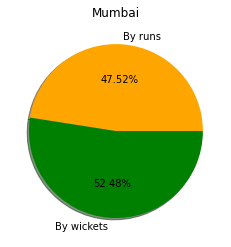

In [59]:
venue_data(input("Enter Venue Name:"))

In [60]:
matches

,id,season,city,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2,2017,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,3,2017,Rajkot,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,4,2017,Indore,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,5,2017,Bangalore,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium
752,11412,2019,Chennai,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium
753,11413,2019,Visakhapatnam,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium
754,11414,2019,Visakhapatnam,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium


**A team at each venue**

In [61]:
def team_at_venue(team):
    team_at_venue_df = matches[(matches['team1']== team) | (matches['team2']==team)]
    team_venue_matches= team_at_venue_df['city'].value_counts()
    team_venue_matches = dict(team_venue_matches)
    i=0
    for key in team_venue_matches:
        team_venue=key
        team_venue_matches = team_at_venue_df[team_at_venue_df['city']==team_venue]
        team_venue_matches_batting_first_wins =team_venue_matches[team_venue_matches['win_by_runs']!=0].count()['win_by_runs']
        team_venue_matches_bowling_first_wins = team_venue_matches[team_venue_matches['win_by_runs']==0].count()['win_by_wickets']
        team_df_venue_matches = pd.DataFrame({'win':['By runs','By wickets'], 'Count': [team_venue_matches_batting_first_wins,team_venue_matches_bowling_first_wins]})
        team_df_venue_matches.set_index('win',inplace = True)
        plt.figure(i)
        i+=1
        plt.pie(team_df_venue_matches['Count'], labels = team_df_venue_matches.index,autopct = "%.2f%%", shadow= True, colors = ['orange', 'green'])
        plt.title(team_venue)
    plt.show();
    

Enter team name:Mumbai Indians


<ipython-input-61-39d32b570735>:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


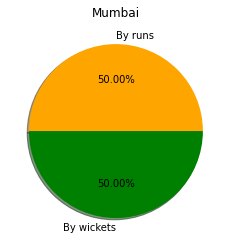

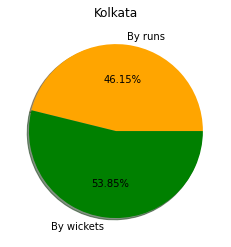

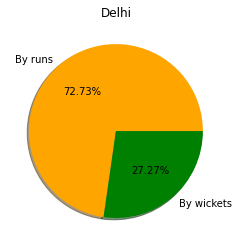

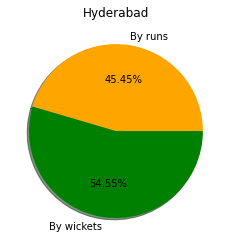

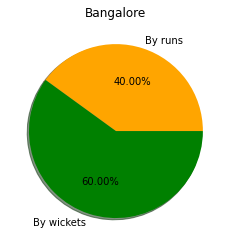

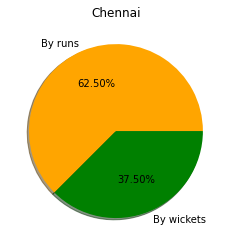

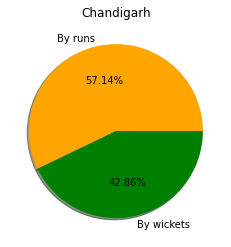

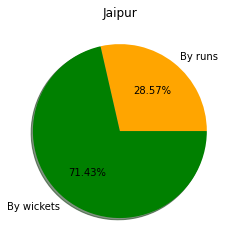

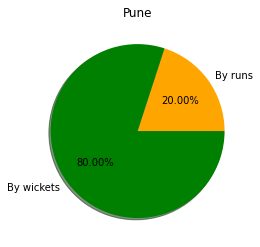

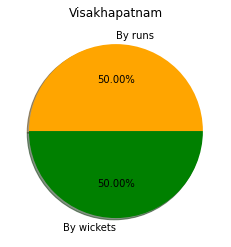

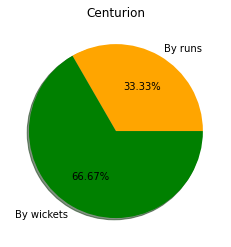

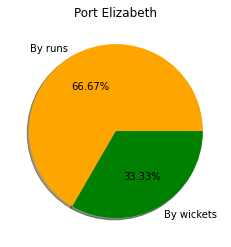

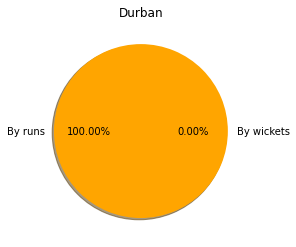

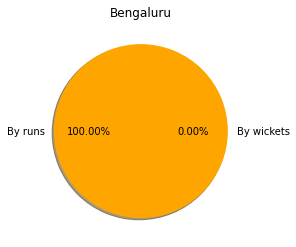

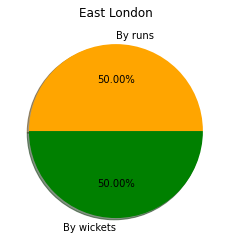

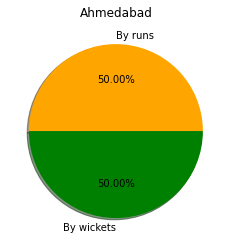

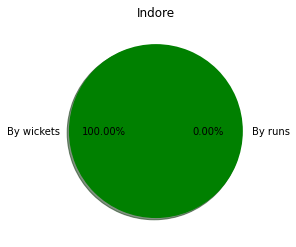

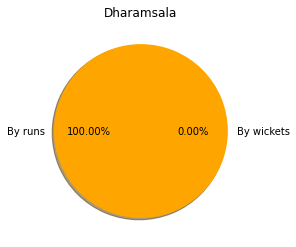

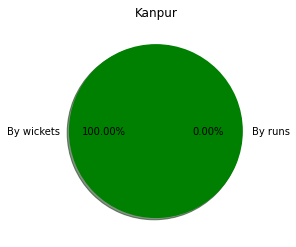

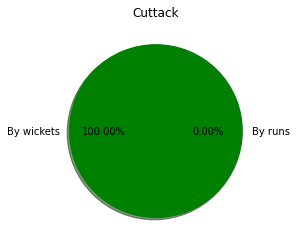

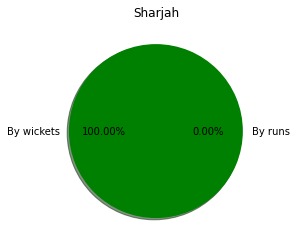

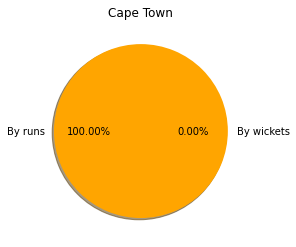

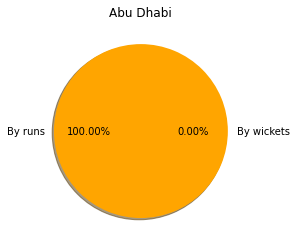

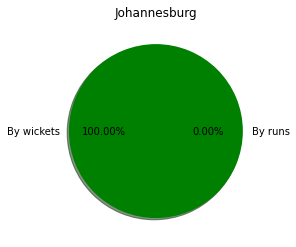

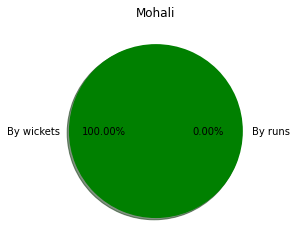

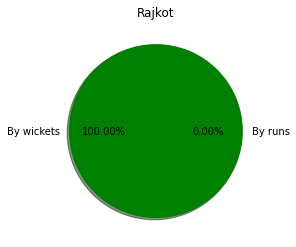

In [62]:
team_at_venue(input("Enter team name:"))

**Two teams head to head**

In [63]:
def both_team_head2head(team_a, team_b):
    temp_a=team_a + ' Wins'
    temp_b = team_b + ' wins'
    both_team_head2head_df = matches[((matches['team1']== team_a) & (matches['team2']==team_b)) | ((matches['team1']== team_b) & (matches['team2']==team_a))]
    df_head2head_matches = pd.DataFrame({'Category':[temp_a, temp_b], 'Count': [both_team_head2head_df[both_team_head2head_df['winner']==team_a].count()['winner'],
                                                 both_team_head2head_df[both_team_head2head_df['winner']==team_b].count()['winner']]})
    df_head2head_matches.set_index('Category')
    df_team_a_record = pd.DataFrame({'Category': ["Batting first wins", "Bowling first wins"],
                                                 'Count': [both_team_head2head_df[(both_team_head2head_df['winner']==team_a) & (both_team_head2head_df['win_by_runs']==0)].count()['winner'],
                                                           both_team_head2head_df[(both_team_head2head_df['winner']==team_a) & (both_team_head2head_df['win_by_wickets']==0)].count()['winner']]})
    df_team_b_record = pd.DataFrame({'Category': ["Batting first wins", "Bowling first wins"],
                                                 'Count': [both_team_head2head_df[(both_team_head2head_df['winner']==team_b) & (both_team_head2head_df['win_by_runs']==0)].count()['winner'],
                                                           both_team_head2head_df[(both_team_head2head_df['winner']==team_b) & (both_team_head2head_df['win_by_wickets']==0)].count()['winner']]})
    plt.figure(1)
    plt.pie(df_head2head_matches['Count'],labels = df_head2head_matches['Category'], autopct= "%.2f%%", shadow =True, colors=['orange', 'green'])
    plt.title("Head to Head")
    plt.figure(2)
    plt.pie(df_team_a_record['Count'], labels = df_team_a_record['Category'], autopct = "%.2f%%", shadow= True, colors = ['orange','green'])
    plt.title(team_a + " Record")
    plt.figure(3)
    plt.pie(df_team_b_record['Count'], labels = df_team_b_record['Category'], autopct = "%.2f%%", shadow= True, colors = ['orange','green'])
    plt.title(team_b + " Record")
    print(df_head2head_matches,"\n\n",team_a,"\n", df_team_a_record,"\n\n", team_b,"\n", df_team_b_record)
    

Enter team A name:Mumbai Indians
Enter team B name:Delhi Capitals
              Category  Count
0  Mumbai Indians Wins      1
1  Delhi Capitals wins      1 

 Mumbai Indians 
              Category  Count
0  Batting first wins      0
1  Bowling first wins      1 

 Delhi Capitals 
              Category  Count
0  Batting first wins      0
1  Bowling first wins      1


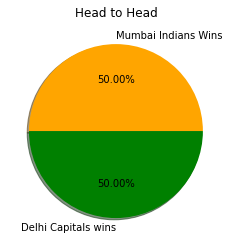

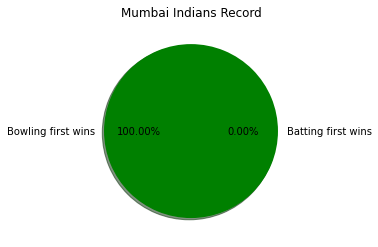

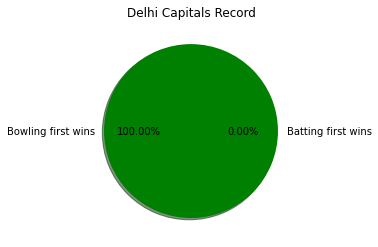

In [64]:
team_a = input("Enter team A name:")
team_b = input("Enter team B name:")
both_team_head2head(team_a, team_b)